In [1]:
import datetime
import glob
import os
import os.path as osp
import platform
import pprint
import random
import shlex
import shutil
import signal
import subprocess
import sys
import threading

import numpy as np
import torch
import yaml
from docopt import docopt
import scipy.io as sio
import lcnn
from lcnn.config import C, M
from lcnn.datasets import WireframeDataset, collate
from lcnn.models.line_vectorizer import LineVectorizer
from lcnn.models.multitask_learner import MultitaskHead, MultitaskLearner
from lcnn.models.HT import hough_transform

In [40]:
import matplotlib.pyplot as plt

In [4]:
from torch.utils.data import TensorDataset, DataLoader
class SimpleCustomBatch:
    def __init__(self, data):
        transposed_data = list(zip(*data))
        self.inp = torch.stack(transposed_data[0], 0)
        self.tgt = torch.stack(transposed_data[1], 0)

    # custom memory pinning method on custom type
    def pin_memory(self):
        self.inp = self.inp.pin_memory()
        self.tgt = self.tgt.pin_memory()
        return self

def collate_wrapper(batch):
    return SimpleCustomBatch(batch)

inps = torch.arange(10 * 5, dtype=torch.float32).view(10, 5)
tgts = torch.arange(10 * 5, dtype=torch.float32).view(10, 5)
dataset = TensorDataset(inps, tgts)

loader = DataLoader(dataset, batch_size=2, collate_fn=collate_wrapper,
                    pin_memory=True)

for batch_ndx, sample in enumerate(loader):
    print(sample.inp.is_pinned())
    print(sample.tgt.is_pinned())

True
True
True
True
True
True
True
True
True
True


In [5]:
with open('./myTmp.ipynb', 'r') as f:
    identifier = id(f)
    print(identifier)

1276189738688


In [7]:
rootdir = './figs'
filelist = glob.glob(f"{rootdir}/exp_*.png")

In [11]:
from skimage import io
iname = filelist[1]
image = io.imread(iname).astype(float)[:, :, :3]

In [19]:
image.shape

(555, 555, 3)

In [23]:
image[:, ::-1, :].shape

(555, 555, 3)

In [7]:
sum()

2

In [2]:
sum([[2], [1], [2]], [])

[2, 1, 2]

In [1]:
import numpy as np
np.cumsum([sum(h) for h in [[2], [1], [2]]])

array([2, 3, 5], dtype=int32)

In [2]:
rows, cols = 2, 3
np.ones((rows, cols)).nonzero()

(array([0, 0, 0, 1, 1, 1], dtype=int64),
 array([0, 1, 2, 0, 1, 2], dtype=int64))

In [121]:
wireframe_path = "U:\\my_projs\\dl_dataset\\wireframe\\valid\\00031546_0_label.npz"
york_path = "U:\\my_projs\\dl_dataset\\york\\valid\\P1020171_label.npz"

# wireframe_path = "D:\\data_wireframe_test\\valid\\00031546_0_label.npz"
npz_file_path = wireframe_path
npz = np.load(npz_file_path, mmap_mode='r')
for npz_key in npz.keys():
    print(npz_key, ': ', npz[npz_key].shape)

aspect_ratio :  ()
jmap :  (1, 128, 128)
joff :  (1, 2, 128, 128)
lmap :  (128, 128)
junc :  (172, 3)
Lpos :  (128, 2)
Lneg :  (4000, 2)
lpos :  (128, 2, 3)
lneg :  (2000, 2, 3)


In [ ]:
### 1 junction: "jmap"
data = npz["jmap"][0] # (128, 128)
plt.imshow(data, cmap='hot', interpolation='nearest')  # jmap


# for a, b, _ in npz["junc"]:
#     plt.scatter(b, a)
plt.show()

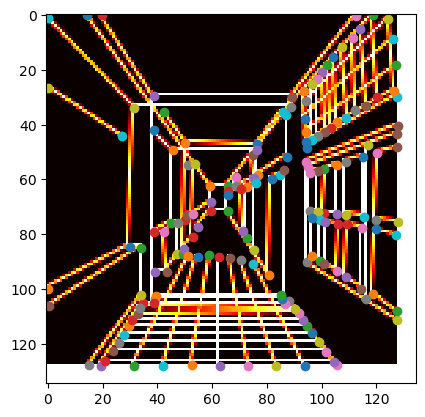

In [75]:
### 1 junction: "lmap" + "junc"
data = npz["lmap"] 
plt.imshow(data, cmap='hot', interpolation='nearest')  # jmap

for a, b, _ in npz["junc"]:
    plt.scatter(b, a)
plt.show()

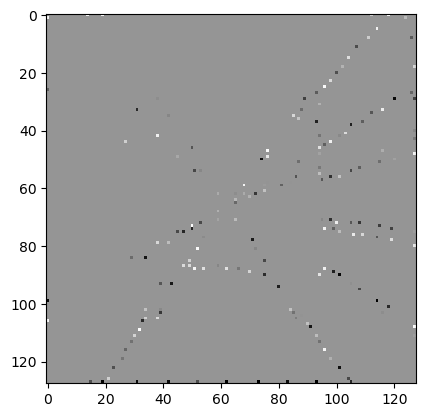

In [94]:
### 1 juctions "joff"
data = npz["joff"][0][0] # (128, 128)
plt.imshow(data, cmap='Greys', interpolation='nearest')  # jmap


# for a, b, _ in npz["junc"]:
#     plt.scatter(b, a)
plt.show()

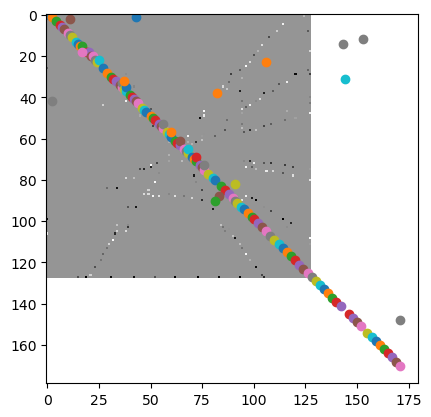

In [105]:
data = npz["joff"][0][0] # (128, 128)
plt.imshow(data, cmap='Greys', interpolation='nearest')  # jmap

for a, b in npz["Lpos"]:
    plt.scatter(b, a)
plt.show()

In [108]:
npz["Lneg"][1]

array([139, 142], dtype=int64)

In [116]:
heatmap_scale = (128, 128)
type(heatmap_scale)
len(heatmap_scale)

2

In [117]:
(1,) + heatmap_scale

(1, 128, 128)